## **NAME : Joel Christopher Silas**

## **EMAIL ID : jsilascompengg2021@gmail.com**

## **CONTACT NUMBER : 7057596630 , 8010814469**

## **BATCH : DS_PLOT MY DATA BATCH 2**

## **Topic : Reinforcement Learning**

# **Data Science Project 1 : Best Ad Prediction (UCB)**:

# **--------------------------------------------------------------------------------**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [ ]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [ ]:
import math

num_of_rounds=df.shape[0]    # or len(df.index)
num_of_ads=df.shape[1]     # or len(df.columns)

num_of_selections=[0]*num_of_ads
sum_of_rewards=[0]*num_of_ads

# print(num_of_selections)

ads_selected=[]
total_reward=0
max_upper_bound=0

for i in range(num_of_rounds):
    ad=0
    max_upper_bound=0
    for j in range(num_of_ads):
        if(num_of_selections[j]>0):
            # print(j)
            average=sum_of_rewards[j]/num_of_selections[j]
            delta=math.sqrt(3/2 * math.log(i+1)/num_of_selections[j])
            upper_bound = average+delta
        else:
            upper_bound = 1e400
        
        if(upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=j         

    ads_selected.append(ad)
    reward=df.values[i,ad]
    total_reward+=reward
    sum_of_rewards[ad]+=reward
    num_of_selections[ad]+=1

print("Total reward obtained for each ad : ",sum_of_rewards)
print("Total rewards obtained due to all the ads : ",total_reward)
print("Ads selected in each round : ",ads_selected)

Total reward obtained for each ad :  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total rewards obtained due to all the ads :  2178
Ads selected in each round :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 

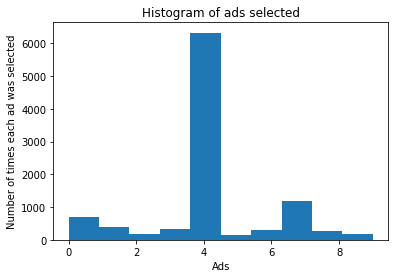

In [ ]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()

## **Hence, ad 4 is predicted to be the best**

# **--------------------------------------------------------------------------------**

# **Data Science Project 1 : Best Ad Prediction (Thompson Sampling)**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [ ]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [ ]:
import random

num_of_rounds=df.shape[0]    # or len(df.index)
num_of_ads=df.shape[1]     # or len(df.columns)

num_of_selections=[0]*num_of_ads
sum_of_rewards=[0]*num_of_ads

num_of_rewards0 = [0]*num_of_ads
num_of_rewards1 = [0]*num_of_ads

# print(num_of_selections)

ads_selected=[]
total_reward=0

for i in range(num_of_rounds):
    ad=0
    max_random=0
    for j in range(num_of_ads):
        random_beta = random.betavariate(num_of_rewards0[j]+1,num_of_rewards1[j]+1)

        if(random_beta>max_random):
            max_random=random_beta
            ad=j

    ads_selected.append(ad)
    reward=df.values[i,ad]

    if reward==1:
        num_of_rewards1[ad]+=1
    else:
        num_of_rewards0[ad]+=1
    total_reward+=reward
        

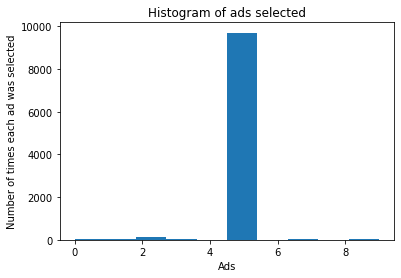

In [ ]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()